# Final Project DL model Notebook - linear model

#### imports, settings and constants

In [1]:
import sys

from keras.models import Sequential
from keras.layers import BatchNormalization, Flatten, Dense
from keras.optimizers import Adam

from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from utils import *

current_dir = Path.cwd()
HOME_DIR = current_dir.parent
DATA_DIR = HOME_DIR.joinpath('data')

# comment out one of the two path options to toggle between sample directory and all data
# path = DATA_HOME_DIR
path = DATA_DIR.joinpath('sample')
train_path = path.joinpath('train')
val_path = path.joinpath('valid')
test_path = path.joinpath('test')
results_path = path.joinpath('tesults')

# training variables
batch_size = 10
epochs = 5
learning_rate = 1e-5

Using Theano backend.


#### getting training and validation data in batches

In [2]:
batches = get_in_batches(train_path)
val_batches = get_in_batches(val_path)
test_batches = get_in_batches(test_path)

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


#### and getting the classes, labels and filenames for each batch

In [3]:
trn_classes = batches.classes
val_classes = val_batches.classes
trn_labels = to_categorical(batches.classes)
val_labels = to_categorical(val_batches.classes)
trn_filenames = batches.filenames
val_filenames = val_batches.filenames

#### defining linear model

In [4]:
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
model.compile(Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 3, 224, 224)       12        
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1505290   
Total params: 1,505,302
Trainable params: 1,505,296
Non-trainable params: 6
_________________________________________________________________


#### fit_generator() consuming the batches provided by the ImageDataGenerator to fit the model to the data

In [5]:
history = model.fit_generator(batches,
                    steps_per_epoch=batches.batch_size,
                    validation_data=val_batches,
                    validation_steps=val_batches.batch_size,
                    epochs=epochs)

Epoch 1/5
4/4 [==============================] - 0s - loss: 3.0307 - acc: 0.1250 - val_loss: 11.9009 - val_acc: 0.0625
Epoch 2/5
4/4 [==============================] - 0s - loss: 3.5787 - acc: 0.1875 - val_loss: 11.1436 - val_acc: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 0s - loss: 3.4263 - acc: 0.1875 - val_loss: 9.6375 - val_acc: 0.1875
Epoch 4/5
4/4 [==============================] - 0s - loss: 3.9118 - acc: 0.1250 - val_loss: 9.6977 - val_acc: 0.1875
Epoch 5/5
4/4 [==============================] - 0s - loss: 3.2273 - acc: 0.0000e+00 - val_loss: 8.1766 - val_acc: 0.1250


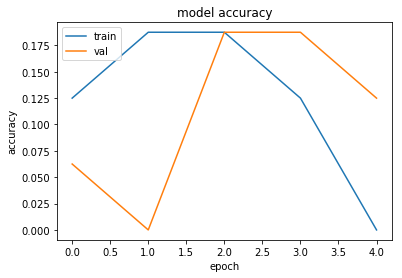

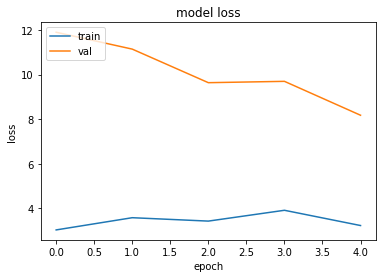

In [6]:
plot_acc_and_loss(history)